# MSDS692 Project: Data Preprocessing - Marijuana sales CO
## Natalia Weakly    

### Original data source: https://www.colorado.gov/pacific/revenue/colorado-marijuana-sales-reports 

Data are unaudited and subject to change at any time.

- medical marijuana summarizes sales (gross sales minus wholesale) and sales of accessories/other products that do not contain retail marijuana.
- marijuana summarizes sales (gross sales minus wholesale). It does not include sales of accessories/other products that do not contain retail marijuana.

Source: Retail Marijuana sales as reported on the Retail Marijuana Sales Tax Returns and Medical Marijuana Sales as reported on the State Retail Sales Tax Return (DR 100).

Publish date: January 2019


In [1]:
#Imports
import pandas as pd
import numpy as np
import datetime

In [2]:
#Load data
mj_sales = pd.read_excel('MJSales.xlsx', skiprows=4, parsedates=True)

In [3]:
#Check results
mj_sales.head()

,Unnamed: 0,Monthly Sales,Year to Date,Monthly Sales.1,Year to Date.1,Monthly Sales.2,Year to Date.2,Total to Date
0,Jan 2014,32541720.0,32541720.0,14022213.0,14022213.0,46563933.0,46563933.0,46563933.0
1,Feb 2014,31738572.0,64280292.0,14248473.0,28270686.0,45987045.0,92550978.0,92550978.0
2,Mar 2014,34821878.0,99102170.0,19881631.0,48152317.0,54703509.0,147254487.0,147254487.0
3,Apr 2014,32686869.0,131789039.0,20765986.0,68918303.0,53452855.0,200707342.0,200707342.0
4,May 2014,31355208.0,163144247.0,21375001.0,90293304.0,52730209.0,253437551.0,253437551.0


In [4]:
mj_sales.tail()

,Unnamed: 0,Monthly Sales,Year to Date,Monthly Sales.1,Year to Date.1,Monthly Sales.2,Year to Date.2,Total to Date
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Source: Retail Marijuana sales as reported on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,"Prepared by: Colorado Department of Revenue, O...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Publish date: January 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#change column names
mj_sales.columns=['date', 'medical_monthly', 'medical_ytd', 'retail_monthly', 'retail_ytd', 'total_monthly', 'total_ytd', 'total_todate']

In [6]:
mj_sales.head()

,date,medical_monthly,medical_ytd,retail_monthly,retail_ytd,total_monthly,total_ytd,total_todate
0,Jan 2014,32541720.0,32541720.0,14022213.0,14022213.0,46563933.0,46563933.0,46563933.0
1,Feb 2014,31738572.0,64280292.0,14248473.0,28270686.0,45987045.0,92550978.0,92550978.0
2,Mar 2014,34821878.0,99102170.0,19881631.0,48152317.0,54703509.0,147254487.0,147254487.0
3,Apr 2014,32686869.0,131789039.0,20765986.0,68918303.0,53452855.0,200707342.0,200707342.0
4,May 2014,31355208.0,163144247.0,21375001.0,90293304.0,52730209.0,253437551.0,253437551.0


In [7]:
#drop columns with year-to-date statistcs
mj_sales.drop(['medical_ytd', 'retail_ytd', 'total_ytd', 'total_todate'], axis=1, inplace=True)

In [8]:
mj_sales.head()

,date,medical_monthly,retail_monthly,total_monthly
0,Jan 2014,32541720.0,14022213.0,46563933.0
1,Feb 2014,31738572.0,14248473.0,45987045.0
2,Mar 2014,34821878.0,19881631.0,54703509.0
3,Apr 2014,32686869.0,20765986.0,53452855.0
4,May 2014,31355208.0,21375001.0,52730209.0


In [9]:
mj_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
date               66 non-null object
medical_monthly    59 non-null float64
retail_monthly     59 non-null float64
total_monthly      59 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


In [10]:
mj_sales.tail(15)

,date,medical_monthly,retail_monthly,total_monthly
55,Aug 2018,28323863.0,112998245.0,141322108.0
56,Sep 2018,27897573.0,107638880.0,135536453.0
57,Oct 2018,27919377.0,101305394.0,129224771.0
58,Nov 2018,26062807.0,97877084.0,123939891.0
59,Dec 2018,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN
61,Data are unaudited and subject to change at an...,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN
63,1 This column summarizes medical marijuana sal...,NaN,NaN,NaN
64,2 This column summarizes retail marijuana sale...,NaN,NaN,NaN


In [11]:
#Drop empty and non-informative rows in the end
mj_sales= mj_sales[:-10]

In [12]:
#Check results
mj_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
date               60 non-null object
medical_monthly    59 non-null float64
retail_monthly     59 non-null float64
total_monthly      59 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [13]:
mj_sales.head()

,date,medical_monthly,retail_monthly,total_monthly
0,Jan 2014,32541720.0,14022213.0,46563933.0
1,Feb 2014,31738572.0,14248473.0,45987045.0
2,Mar 2014,34821878.0,19881631.0,54703509.0
3,Apr 2014,32686869.0,20765986.0,53452855.0
4,May 2014,31355208.0,21375001.0,52730209.0


In [14]:
mj_sales.tail()

,date,medical_monthly,retail_monthly,total_monthly
55,Aug 2018,28323863.0,112998245.0,141322108.0
56,Sep 2018,27897573.0,107638880.0,135536453.0
57,Oct 2018,27919377.0,101305394.0,129224771.0
58,Nov 2018,26062807.0,97877084.0,123939891.0
59,Dec 2018,NaN,NaN,NaN


In [15]:
#Use fillforward (use last known values) to impute missing values for December 2018
mj_sales2= mj_sales.fillna(method='ffill')

In [16]:
#check results
mj_sales2.tail()

,date,medical_monthly,retail_monthly,total_monthly
55,Aug 2018,28323863.0,112998245.0,141322108.0
56,Sep 2018,27897573.0,107638880.0,135536453.0
57,Oct 2018,27919377.0,101305394.0,129224771.0
58,Nov 2018,26062807.0,97877084.0,123939891.0
59,Dec 2018,26062807.0,97877084.0,123939891.0


In [17]:
# convert 'date' column to the proper datetime format
mj_sales['date']=pd.to_datetime(mj_sales['date'])

In [18]:
#check results
mj_sales.head()

,date,medical_monthly,retail_monthly,total_monthly
0,2014-01-01,32541720.0,14022213.0,46563933.0
1,2014-02-01,31738572.0,14248473.0,45987045.0
2,2014-03-01,34821878.0,19881631.0,54703509.0
3,2014-04-01,32686869.0,20765986.0,53452855.0
4,2014-05-01,31355208.0,21375001.0,52730209.0


In [19]:
mj_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
date               60 non-null datetime64[ns]
medical_monthly    59 non-null float64
retail_monthly     59 non-null float64
total_monthly      59 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


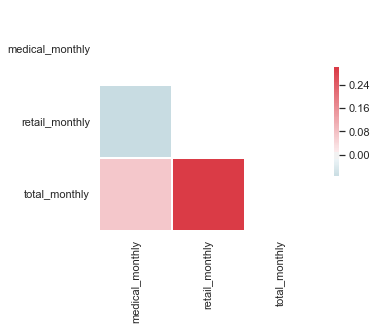

In [23]:
#look at the correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

corr=mj_sales.corr()

#Correlation matrix
# see official Seaborn guide at https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=correlation 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [21]:
#Print out correlation matrix
corr

,medical_monthly,retail_monthly,total_monthly
medical_monthly,1.000000,-0.073069,0.069869
retail_monthly,-0.073069,1.000000,0.989784
total_monthly,0.069869,0.989784,1.000000



Not surprisingly, there is an exceptionally strong (almost 99%) correlation between the sales of recreational marijuana and total marijuana sales. The link between medical and recreational marijuana sales is very weak and negative. 


In [22]:
#output marijuana sales to a file for future use
mj_sales2.to_csv('marijuanaSalesCO.csv', date_format='%Y-%m-%d %H:%M:%S')